In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Admission_predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.drop(["Serial No."],axis=1,inplace=True)

In [5]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [9]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df = pd.DataFrame(data)

In [11]:
df.columns = df.columns.str.replace(' ', '_')

In [12]:
print("\n\n", df)



      GRE_Score  TOEFL_Score  University_Rating  SOP  LOR_  CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance_of_Admit_  
0                0.92  
1                0.76  


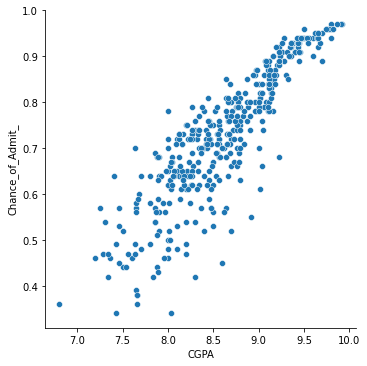

In [13]:
sns.relplot(x='CGPA',y='Chance_of_Admit_',data=data)

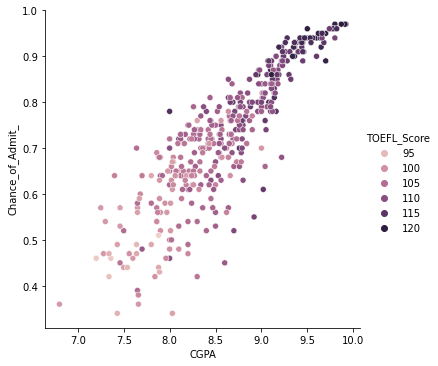

In [14]:
sns.relplot(x='CGPA',y='Chance_of_Admit_',hue='TOEFL_Score',data=data)

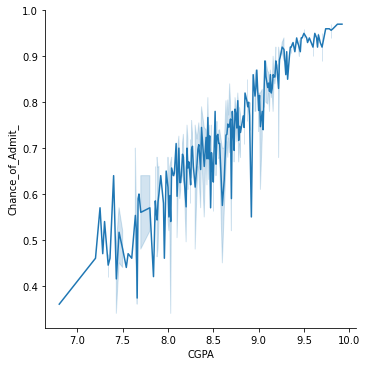

In [15]:
sns.relplot(x='CGPA',y='Chance_of_Admit_',data=data,kind="line")

<AxesSubplot:xlabel='University_Rating', ylabel='count'>

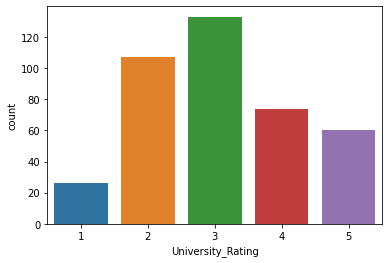

In [16]:
sns.countplot(x="University_Rating",data=data)

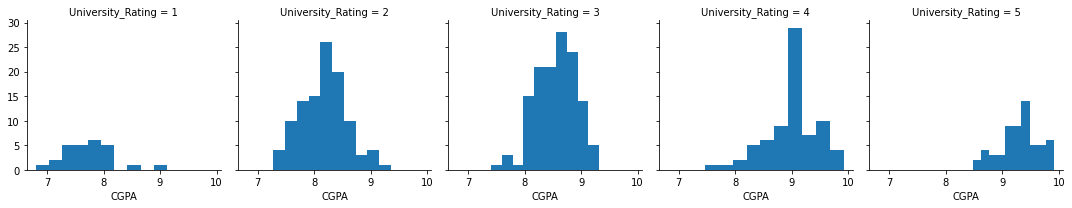

In [17]:
b=sns.FacetGrid(data,col="University_Rating")
b.map(plt.hist,"CGPA")

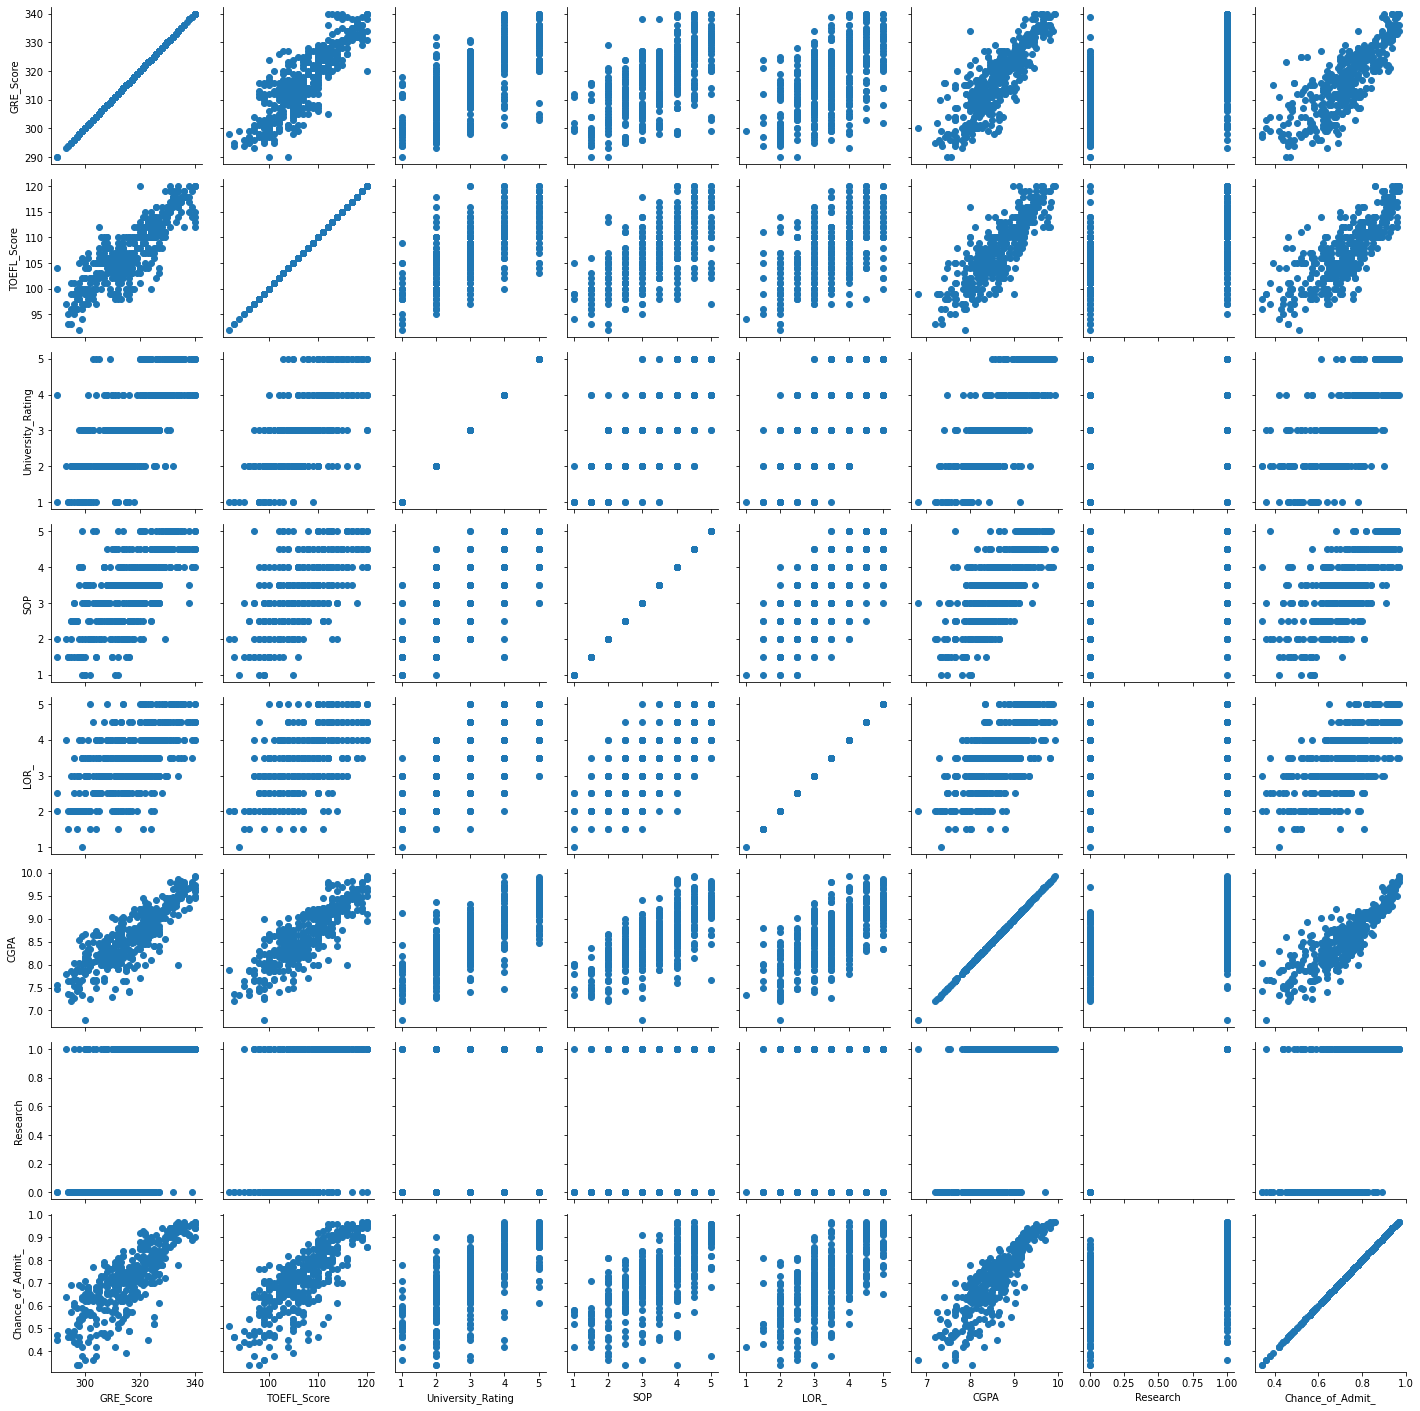

In [18]:
b=sns.PairGrid(data)
b.map(plt.scatter)

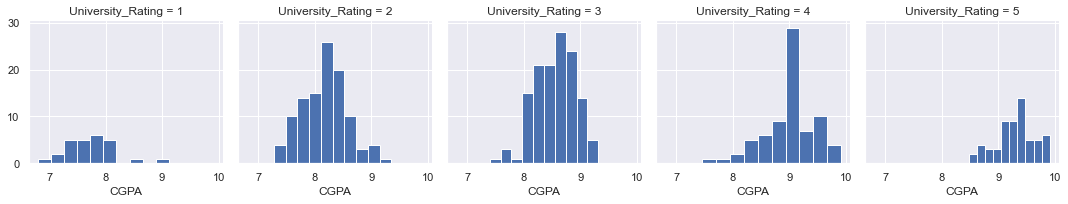

In [19]:
sns.set(style="darkgrid")
b=sns.FacetGrid(data,col="University_Rating")
b.map(plt.hist,"CGPA")

<AxesSubplot:xlabel='University_Rating', ylabel='Chance_of_Admit_'>

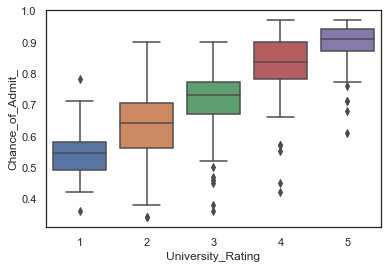

In [20]:
sns.set(style="white",color_codes=True)
sns.boxplot(x='University_Rating',y='Chance_of_Admit_',data=data)

In [21]:
independent = data.iloc[:,0:7].values
dependent = data.iloc[:,7:].values

In [22]:
independent.shape

(400, 7)

In [23]:
dependent.shape

(400, 1)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .2)

In [26]:
X_train

array([[303.  , 105.  ,   5.  ,   5.  ,   4.5 ,   8.65,   0.  ],
       [301.  , 104.  ,   2.  ,   3.5 ,   3.5 ,   7.89,   1.  ],
       [312.  , 103.  ,   3.  ,   3.5 ,   4.  ,   8.78,   0.  ],
       [308.  , 103.  ,   2.  ,   2.5 ,   4.  ,   8.36,   1.  ],
       [315.  , 104.  ,   3.  ,   3.  ,   2.5 ,   8.33,   0.  ],
       [334.  , 120.  ,   5.  ,   4.  ,   5.  ,   9.87,   1.  ],
       [340.  , 115.  ,   5.  ,   4.5 ,   4.5 ,   9.45,   1.  ],
       [334.  , 119.  ,   5.  ,   4.5 ,   4.5 ,   9.48,   1.  ],
       [316.  ,  98.  ,   1.  ,   1.5 ,   2.  ,   7.43,   0.  ],
       [320.  , 104.  ,   3.  ,   3.5 ,   4.5 ,   8.34,   1.  ],
       [299.  ,  97.  ,   3.  ,   5.  ,   3.5 ,   7.66,   0.  ],
       [320.  , 110.  ,   5.  ,   5.  ,   4.5 ,   9.22,   1.  ],
       [314.  , 107.  ,   3.  ,   3.  ,   3.5 ,   8.17,   1.  ],
       [327.  , 104.  ,   5.  ,   3.  ,   3.5 ,   8.84,   1.  ],
       [300.  , 102.  ,   2.  ,   1.5 ,   2.  ,   7.87,   0.  ],
       [298.  ,  99.  ,  

In [27]:
X_test

array([[309.  , 105.  ,   5.  , ...,   3.5 ,   8.56,   0.  ],
       [308.  , 110.  ,   4.  , ...,   3.  ,   8.6 ,   0.  ],
       [326.  , 110.  ,   3.  , ...,   3.5 ,   8.76,   1.  ],
       ...,
       [339.  , 116.  ,   4.  , ...,   3.5 ,   9.8 ,   1.  ],
       [340.  , 120.  ,   4.  , ...,   4.  ,   9.92,   1.  ],
       [300.  , 104.  ,   3.  , ...,   3.  ,   8.16,   0.  ]])

In [28]:
y_train

array([[0.77],
       [0.68],
       [0.67],
       [0.7 ],
       [0.67],
       [0.97],
       [0.94],
       [0.94],
       [0.49],
       [0.74],
       [0.38],
       [0.92],
       [0.73],
       [0.71],
       [0.56],
       [0.46],
       [0.73],
       [0.78],
       [0.73],
       [0.53],
       [0.69],
       [0.51],
       [0.52],
       [0.63],
       [0.52],
       [0.72],
       [0.42],
       [0.84],
       [0.58],
       [0.46],
       [0.75],
       [0.68],
       [0.94],
       [0.63],
       [0.97],
       [0.74],
       [0.91],
       [0.78],
       [0.89],
       [0.95],
       [0.82],
       [0.91],
       [0.83],
       [0.93],
       [0.72],
       [0.82],
       [0.79],
       [0.81],
       [0.83],
       [0.73],
       [0.76],
       [0.66],
       [0.71],
       [0.93],
       [0.71],
       [0.94],
       [0.78],
       [0.94],
       [0.96],
       [0.87],
       [0.46],
       [0.48],
       [0.94],
       [0.66],
       [0.64],
       [0.94],
       [0.

In [29]:
y_test

array([[0.71],
       [0.7 ],
       [0.79],
       [0.73],
       [0.72],
       [0.48],
       [0.77],
       [0.71],
       [0.9 ],
       [0.94],
       [0.58],
       [0.89],
       [0.72],
       [0.57],
       [0.78],
       [0.42],
       [0.64],
       [0.84],
       [0.63],
       [0.72],
       [0.9 ],
       [0.83],
       [0.57],
       [0.47],
       [0.85],
       [0.67],
       [0.44],
       [0.54],
       [0.92],
       [0.62],
       [0.68],
       [0.73],
       [0.73],
       [0.61],
       [0.55],
       [0.74],
       [0.64],
       [0.89],
       [0.73],
       [0.95],
       [0.71],
       [0.72],
       [0.75],
       [0.76],
       [0.86],
       [0.7 ],
       [0.39],
       [0.79],
       [0.61],
       [0.64],
       [0.71],
       [0.8 ],
       [0.61],
       [0.89],
       [0.68],
       [0.79],
       [0.78],
       [0.52],
       [0.76],
       [0.88],
       [0.74],
       [0.49],
       [0.65],
       [0.59],
       [0.87],
       [0.89],
       [0.